## Assignment Questions

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables. <br>

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary. <br>

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility. <br>

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.<br>

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results. <br>

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends. <br>

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.<br>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for visualization
import plotly.express as px # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Data Preprocessing

In [6]:
print('Checking for Null values in the dataframe:','\n',df.isnull().sum(),'\n')

Checking for Null values in the dataframe: 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64 



### As there are no Missing Values in Dataset

### Numerical Summary

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [8]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Count: The dataset contains 768 records or instances.
* Pregnancies: On average, the women in the dataset have had approximately 3.8 pregnancies.
* Glucose: The mean glucose level is around 121.7 mg/dL, indicating the average blood sugar concentration.
* BloodPressure: The average blood pressure is approximately 72.3 mm Hg, representing the mean arterial pressure.
* SkinThickness: The average skin thickness is about 26.6 mm, which can provide insights into body composition or health.
* Insulin: The mean insulin level is around 118.7 μU/ml, indicating the average insulin concentration in the blood.
* BMI (Body Mass Index): The average BMI is approximately 32.5, which is used as an indicator of body fatness.
* DiabetesPedigreeFunction: The mean value for this feature is 0.4719, which measures the diabetes genetic influence based on family history.
* Age: The average age of the women in the dataset is approximately 33.2 years.
* Outcome: The target variable, "Outcome," indicates whether a person has diabetes (1) or not (0).

Additionally, the statistical measures provided offer further insights:

* Standard Deviation (std): It shows the amount of variability or dispersion in the respective feature.
* Minimum (min): The minimum values indicate the lowest observed values for each feature.
* 25th Percentile (25%): This value represents the lower quartile or the point below which 25% of the data falls.
* Median (50%): The median value represents the midpoint of the data, separating the lower 50% from the upper 50%.
* 75th Percentile (75%): This value represents the upper quartile or the point below which 75% of the data falls.
* Maximum (max): The maximum values indicate the highest observed values for each feature.

By analyzing these insights, one can better understand the distribution and characteristics of the dataset, which can be useful for further analysis and modeling tasks related to diabetes prediction or exploration of related factors

## Checking Outliers

<Axes: xlabel='Pregnancies'>

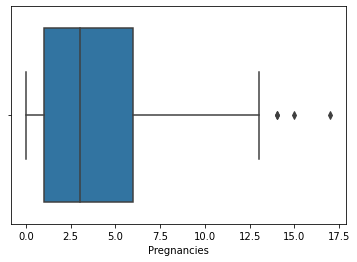

In [10]:
sns.boxplot(df['Pregnancies'])

<Axes: xlabel='Insulin'>

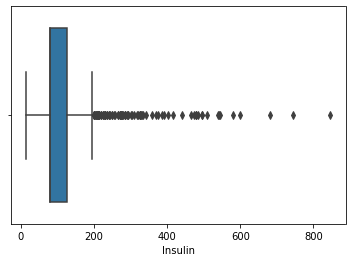

In [11]:
sns.boxplot(df['Insulin'])

__Now we will replace outliers of each column with Lower and Upper bounds of each column:__

In [12]:
# Loop for replacing outliers above upper bound with the upper bound value:
for column in df.select_dtypes([float, int]).columns :
   
    col_IQR = df[column].quantile(.75) - df[column].quantile(.25)
    col_Max =  df[column].quantile(.75) + (1.5*col_IQR)
    df[column][df[column] > col_Max] =  col_Max

In [13]:
# Loop for replacing outliers under lower bound with the lower bound value:
for column in df.select_dtypes([float, int]).columns :
    col_IQR = df[column].quantile(.75) - df[column].quantile(.25)
    col_Min =  df[column].quantile(.25) - (1.5*col_IQR)
    df[column][df[column] < col_Min] =  col_Min

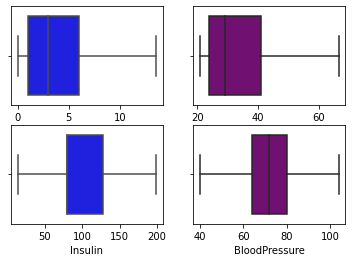

In [14]:
#Box plots before handling outliers
fig, axs = plt.subplots(nrows=2, ncols= 2)
sns.boxplot(df['Pregnancies'], ax=axs[0,0], color='blue')
sns.boxplot(df['Insulin'], ax=axs[1,0], color='blue');

sns.boxplot(df['Age'], ax=axs[0,1], color='purple')
sns.boxplot(df['BloodPressure'], ax=axs[1,1], color='purple');

## Exploratory Data Analysis

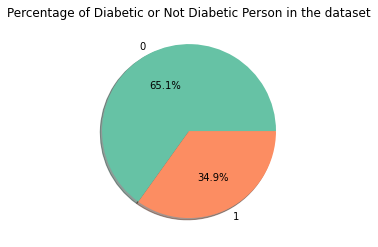

In [15]:
# Data visualization using matlibplot and seaborn libraries
# define Seaborn color palette to use
palette_color = sns.color_palette('Set2')
  
# plotting data on chart
plt.pie(df.Outcome.value_counts().values, labels = df.Outcome.value_counts().index,
        explode=[0, 0] ,colors = palette_color, autopct ='%.1f%%', shadow = True)
plt.title("Percentage of Diabetic or Not Diabetic Person in the dataset")        
  
# displaying chart
plt.show()

As Many people are not Diabetic or less people are diabetic

## Numerical features distribution :

In [16]:
df.select_dtypes(int).columns

Index(['Outcome'], dtype='object')

In [17]:
df.select_dtypes(float).columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### Age distribution of the Diabetic Person

In [18]:
df.Age[df.Outcome==1].describe()

count    268.000000
mean      37.052239
std       10.925826
min       21.000000
25%       28.000000
50%       36.000000
75%       44.000000
max       66.500000
Name: Age, dtype: float64

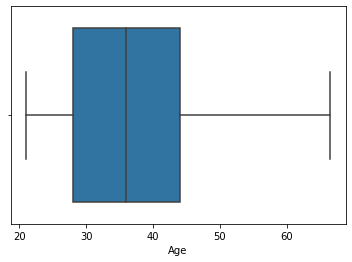

In [19]:
sns.boxplot(df.Age[df.Outcome==1]);
plt.show()

- Mean Age = Median Age which is about 37 years

### Pregencies distribution of the Diabetic Person

In [20]:
df.Pregnancies[df.Outcome==1].describe()

count    268.000000
mean       4.843284
std        3.681321
min        0.000000
25%        1.750000
50%        4.000000
75%        8.000000
max       13.500000
Name: Pregnancies, dtype: float64

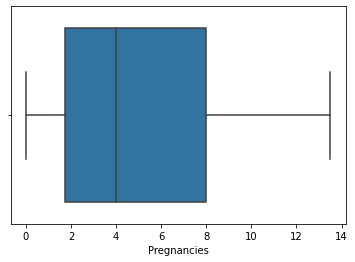

In [21]:
sns.boxplot(df.Pregnancies[df.Outcome==1]);
plt.show()

- Mean Pregencies = Median Pregencies is 4 Times

### Glucose Distribution of the Diabetic Person

In [22]:
df.Glucose[df.Outcome==1].describe()

count    268.000000
mean     142.159661
std       29.545943
min       78.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

- Mean Pregencies of Diabetic Person  is 142

In [23]:
df.BloodPressure[df.Outcome==1].describe()

count    268.000000
mean      74.883162
std       11.601251
min       40.000000
25%       68.000000
50%       74.000000
75%       82.000000
max      104.000000
Name: BloodPressure, dtype: float64

- Mean Blood Pressure of Diabetic Person  is minimum is 40 and Avg Blood Pressure is 74

In [24]:
df.SkinThickness[df.Outcome==1].describe()

count    268.000000
mean      28.638021
std        9.200811
min        7.000000
25%       20.536458
50%       27.000000
75%       36.000000
max       49.195312
Name: SkinThickness, dtype: float64

- Mean SkinThickness of Diabetic Person  is 28mm

In [25]:
df.Insulin[df.Outcome==1].describe()

count    268.000000
mean     117.225149
std       49.915438
min       14.000000
25%       79.799479
50%       79.799479
75%      167.250000
max      198.425781
Name: Insulin, dtype: float64

- Mean Insulin of Diabetic Person  is 117(2-Hour serum insulin (mu U/ml) (integer))

In [26]:
df.BMI[df.Outcome==1].describe()

count    268.000000
mean      35.238004
std        6.138676
min       22.900000
25%       30.900000
50%       34.250000
75%       38.775000
max       50.250000
Name: BMI, dtype: float64

- Mean BMI of Diabetic Person  is 35 (Body mass index (weight in kg/(height in m)^2) (float))

In [27]:
df.DiabetesPedigreeFunction[df.Outcome==1].describe()

count    268.000000
mean       0.531022
std        0.311596
min        0.088000
25%        0.262500
50%        0.449000
75%        0.728000
max        1.200000
Name: DiabetesPedigreeFunction, dtype: float64

- Mean DiabetesPedigreeFunction of Diabetic Person  is 0.53(Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float))

### We can see the relationship between features of the Diabetic 

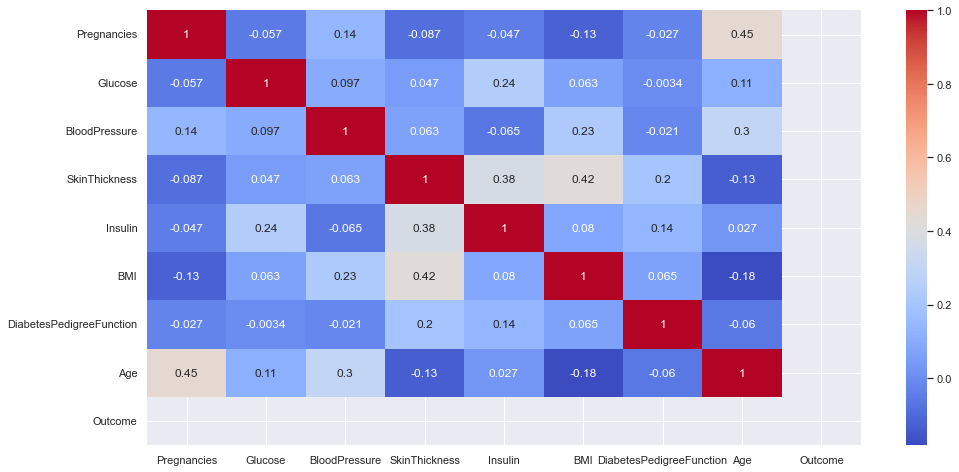

In [28]:
# Let's produce Heat Map
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df[df.Outcome ==1].corr(), annot = True, fmt='.2g',cmap= 'coolwarm');

* Pregnancies:

There is a weak negative correlation (-0.06) between the number of pregnancies and glucose levels.
There is a positive correlation (0.14) between the number of pregnancies and blood pressure.
There is a weak negative correlation (-0.09) between the number of pregnancies and skin thickness.
The correlation with other variables is not available (NaN).

* Glucose:

There is a weak positive correlation (0.10) between glucose levels and blood pressure.
There is no significant correlation between glucose levels and other variables.

* Blood Pressure:

There is a weak positive correlation (0.23) between blood pressure and body mass index (BMI).
There is no significant correlation between blood pressure and other variables.

* Skin Thickness:

There is a weak positive correlation (0.38) between skin thickness and insulin levels.
There is a moderate positive correlation (0.42) between skin thickness and BMI.
There is no significant correlation between skin thickness and other variables.

* Insulin:

There is a weak positive correlation (0.24) between insulin levels and glucose levels.
There is no significant correlation between insulin levels and other variables.

* BMI:

There is a moderate positive correlation (0.42) between BMI and skin thickness.
There is no significant correlation between BMI and other variables.
Diabetes Pedigree Function:

There is no significant correlation between the diabetes pedigree function and other variables.

* Age:

There is a weak positive correlation (0.45) between age and the number of pregnancies.
There is no significant correlation between age and other variables.

* Outcome:

The correlation of the outcome variable with other variables is not available (NaN).

In [29]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### As you see Our Target variable is showing imbalance , So it is not to our data for model making

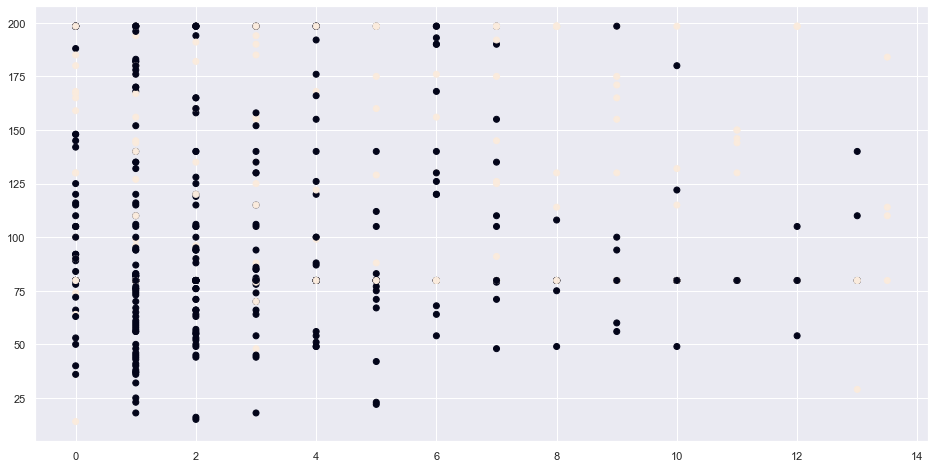

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df['Pregnancies'],df['Insulin'],c=df['Outcome'])

In [31]:
#independent features
X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]

In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0


In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [34]:
!pip install imblearn

In [35]:
from imblearn.over_sampling import SMOTE

# Load your dataset
# Assuming you have X (features) and y (target variable) arrays or dataframes
# X should contain the feature vectors, and y should contain the corresponding labels

# Convert the data to numpy arrays if they are pandas dataframes
if isinstance(X, pd.DataFrame):
    X = X.values
if isinstance(y, pd.DataFrame):
    y = y.values

# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the original and resampled class distribution
unique_classes, class_counts = np.unique(y, return_counts=True)
original_distribution = dict(zip(unique_classes, class_counts))

unique_classes_resampled, class_counts_resampled = np.unique(y_resampled, return_counts=True)
resampled_distribution = dict(zip(unique_classes_resampled, class_counts_resampled))

print("Original Class Distribution:")
print(original_distribution)
print("Resampled Class Distribution:")
print(resampled_distribution)

Original Class Distribution:
{0: 500, 1: 268}
Resampled Class Distribution:
{0: 500, 1: 500}


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [37]:
classifier = DecisionTreeClassifier()

# Fit the regressor to the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
# Perform cross-validation to optimize hyperparameters
scores = cross_val_score(classifier, X_resampled, y_resampled, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.735 0.685 0.735 0.78  0.76 ]
Mean Cross-Validation Score: 0.7389999999999999


In [39]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.775
Precision: 0.7641509433962265
Recall: 0.801980198019802
F1 Score: 0.782608695652174


## Now Applying Hyperparameter Tunning 

In [41]:
## Hyperparameter Tunning
parameter={
 'criterion':['gini', 'entropy', 'log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
    'min_samples_split': [2, 5, 10],
  'max_features':['auto', 'sqrt', 'log2']
    
}

classifier = DecisionTreeClassifier()

In [43]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
classcv = GridSearchCV(classifier, param_grid=parameter, scoring='recall', cv=5)

In [47]:
# Fit the GridSearchCV instance to the training data
classcv.fit(X_train, y_train)

best_params = classcv.best_params_
best_score = classcv.best_score_

print("Best Parameters:", best_params)
print("Best Score (Recall):", best_score)

Best Parameters: {'criterion': 'log_loss', 'max_depth': 1, 'max_features': 'auto', 'min_samples_split': 5, 'splitter': 'best'}
Best Score (Recall): 0.9399050632911393


In [48]:
classifier = DecisionTreeClassifier(criterion='log_loss', max_depth=1, max_features='auto', min_samples_split=5, splitter='best')

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

[Text(0.5, 0.75, 'X[1] <= 155.036\nlog_loss = 1.0\nsamples = 800\nvalue = [401, 399]'),
 Text(0.25, 0.25, 'log_loss = 0.969\nsamples = 643\nvalue = [388, 255]'),
 Text(0.75, 0.25, 'log_loss = 0.412\nsamples = 157\nvalue = [13, 144]')]

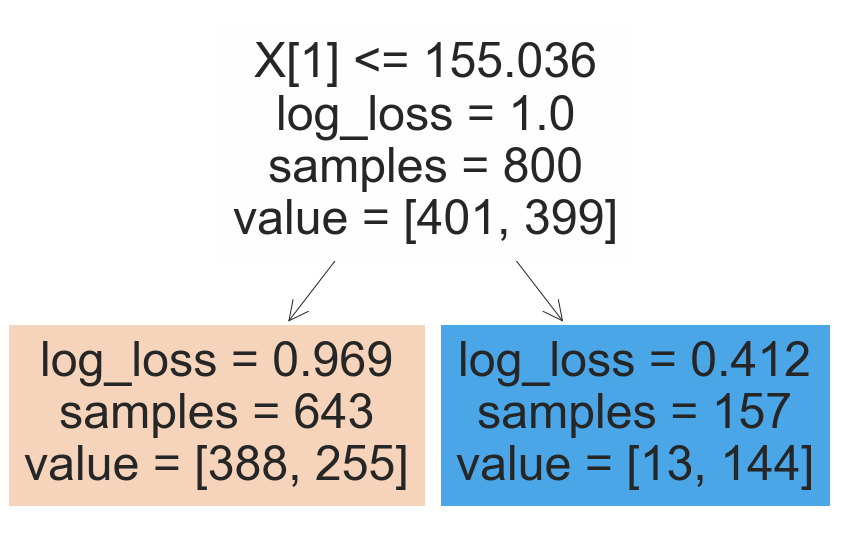

In [49]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [50]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.61
Precision: 0.7674418604651163
Recall: 0.32673267326732675
F1 Score: 0.45833333333333337


### As recall is a metrics that is important in our case , SO it is giving good accuracy

In [51]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[89 10]
 [68 33]]


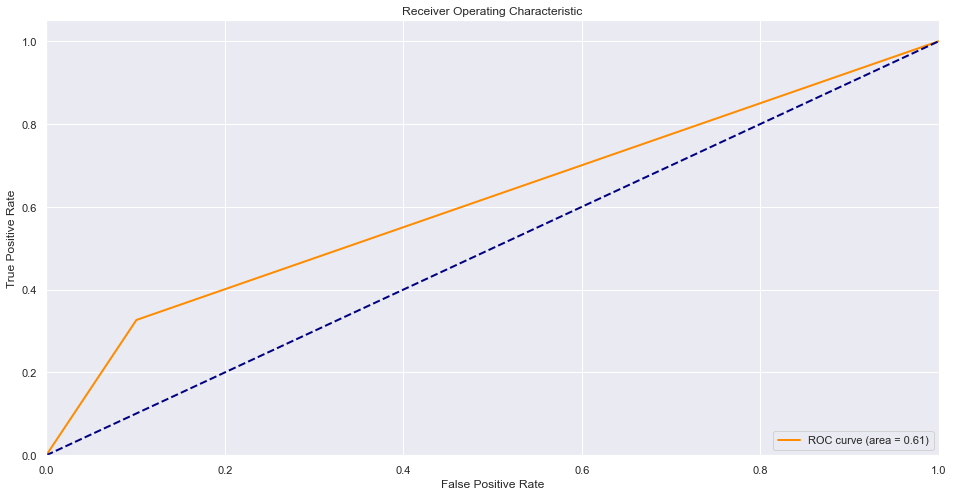

In [53]:
# Plot ROC curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [54]:
###  Now Applying F1_score

In [55]:
## Hyperparameter Tunning
parameter={
 'criterion':['gini', 'entropy', 'log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
    'min_samples_split': [2, 5, 10],
  'max_features':['auto', 'sqrt', 'log2']
    
}

classifier = DecisionTreeClassifier()

In [58]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
classcv = GridSearchCV(classifier, param_grid=parameter, scoring='f1', cv=5)

In [59]:
# Fit the GridSearchCV instance to the training data
classcv.fit(X_train, y_train)

best_params = classcv.best_params_
best_score = classcv.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}
Best Score (Accuracy): 0.794771746803671


In [60]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features='auto', min_samples_split=2, splitter='best')

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

[Text(0.46808510638297873, 0.9166666666666666, 'X[5] <= 26.3\ngini = 0.5\nsamples = 800\nvalue = [401, 399]'),
 Text(0.22872340425531915, 0.75, 'X[7] <= 44.002\ngini = 0.162\nsamples = 135\nvalue = [123, 12]'),
 Text(0.11702127659574468, 0.5833333333333334, 'X[0] <= 2.274\ngini = 0.086\nsamples = 111\nvalue = [106, 5]'),
 Text(0.0425531914893617, 0.4166666666666667, 'X[4] <= 142.0\ngini = 0.031\nsamples = 64\nvalue = [63, 1]'),
 Text(0.02127659574468085, 0.25, 'gini = 0.0\nsamples = 56\nvalue = [56, 0]'),
 Text(0.06382978723404255, 0.25, 'X[5] <= 23.55\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.0425531914893617, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0851063829787234, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.19148936170212766, 0.4166666666666667, 'X[6] <= 0.6\ngini = 0.156\nsamples = 47\nvalue = [43, 4]'),
 Text(0.14893617021276595, 0.25, 'X[1] <= 134.5\ngini = 0.05\nsamples = 39\nvalue = [38, 1]'),
 Text(0.12

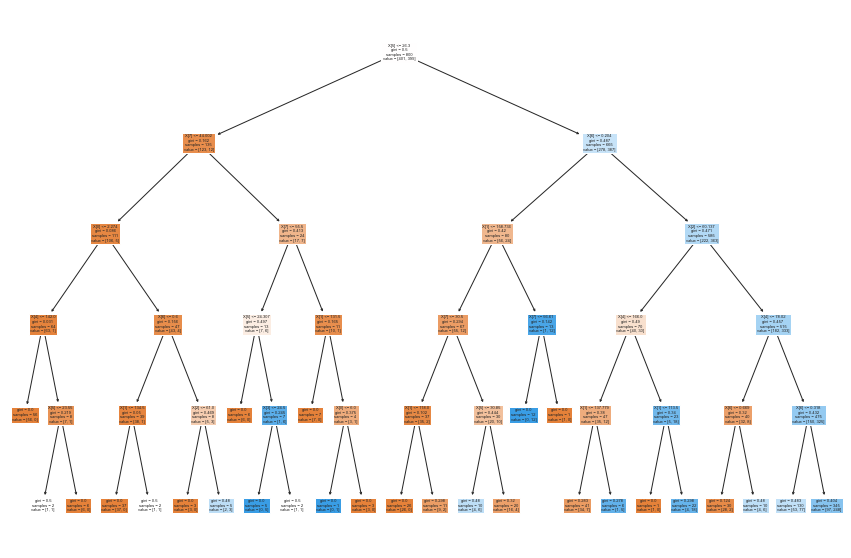

In [61]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [62]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.69
Precision: 0.6382978723404256
Recall: 0.8910891089108911
F1 Score: 0.7438016528925618


In [63]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[48 51]
 [11 90]]


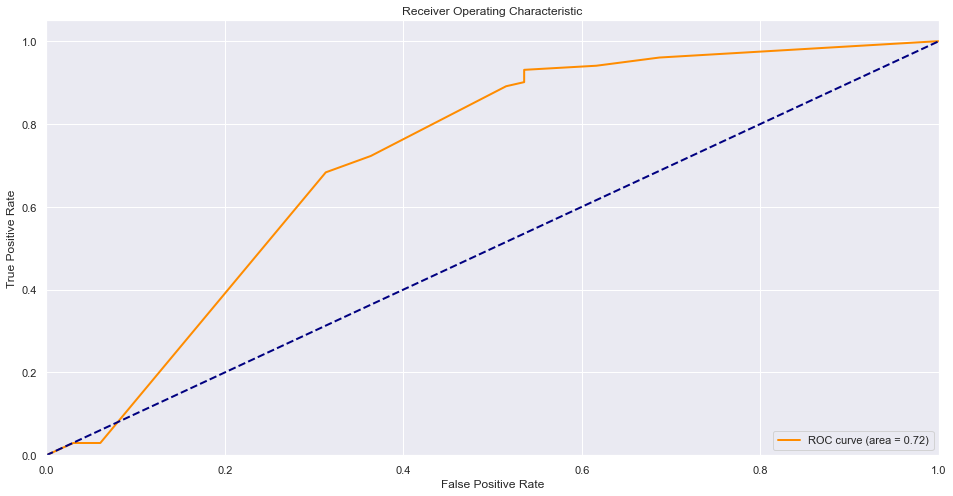

In [64]:
# Plot ROC curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

__As It is better then Recall , So we use F1_score as performance metric__

In [65]:
importances = classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

print("Feature Importances:")
for i in indices:
    print(X[i], ":", importances[i],"\n")

Feature Importances:
[  5.         116.          74.          20.53645833  79.79947917
  25.6          0.201       30.        ] : 0.41593362154895247 

[  0.  137.   40.   35.  168.   43.1   1.2  33. ] : 0.17458709129829023 

[ 3.    78.    50.    32.    88.    31.     0.248 26.   ] : 0.1562884527619454 

[ 1.         85.         66.         29.         79.79947917 26.6
  0.351      31.        ] : 0.13179212560410622 

[ 10.         115.          69.10546875  20.53645833  79.79947917
  35.3          0.134       29.        ] : 0.0566303298723397 

[  8.         183.          64.          20.53645833  79.79947917
  23.3          0.672       32.        ] : 0.04821024068066822 

[  6.         148.          72.          35.          79.79947917
  33.6          0.627       50.        ] : 0.011781261920948673 

[ 1.    89.    66.    23.    94.    28.1    0.167 21.   ] : 0.004776876312749218 



* This line indicates that the feature with index 0 has an importance score of 0.28474864728318133. The values in the square brackets represent the feature values or attributes.

# Question for  instructor :

__As you see  in this problem , We have problem of diabetic in  this our performance shoulb be accuracy because of FN but our other score are declining mean F1_score or accuracy etc or as I applied SMOTE Technique on data set as dataset is imbalanced , So give me remarks wether my whole work is good or any tips to handle such type of Data Or I used F1_score For imbalanced dataset__